#HW 10
##Author Anita Ahmed - ama908@nyu.edu

In [1]:
#Importing Packages
import os
import json
import csv
import urllib2
import zipfile
import numpy as np
import pandas as pd
import geopandas as gp
import sklearn
import sklearn.cluster

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
]

kelly_colors_hex_cmap = dict([(i,kelly_colors_hex[i]) for i in range(len(kelly_colors_hex))])

In [3]:
#LOADING geojson file from website
response = urllib2.urlopen('https://nycdatastables.s3.amazonaws.com/2013-08-19T18:18:28.877Z/nyc-zip-code-tabulation-areas-polygons.geojson')
zip_json = json.load(response)   

In [4]:
#CREATING NEW DATAFRAME AND READING ZIPCODES FROM JSON FILE ADDING IT AS A COLUMN TO DATAFRAME
zipCodes = pd.DataFrame()
zips = []
for i in zip_json['features']:
    zips.append(i['properties']['postalCode'])
zipCodes['zipCode'] = zips
zip_code = pd.DataFrame(zipCodes['zipCode'].astype(int)).drop_duplicates().sort('zipCode')

In [5]:
#REMOVING ERRORS
zip_code = zip_code[zip_code.zipCode > 10000]

In [6]:
#CREATING LOOP TO READ ZIP FILES FOR ESTABLISHMENTS FOR YEAR 1994 TO 2013
for i in range(94,100) + range(14):
    fname = 'zbp%02dtotals.zip' % i
   
    zf = zipfile.ZipFile(fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    try:
        df = pd.DataFrame({('19%02d' if i > 90 else '20%02d') % i: df['EST'], 'zipCode': df['ZIP']})
    except:
        df = pd.DataFrame({('19%02d' if i > 90 else '20%02d') % i: df['est'], 'zipCode': df['zip']})

    zip_code = zip_code.merge(df,on='zipCode',how='left')

In [7]:
zip_code.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 21 columns):
zipCode    246 non-null int32
1994       240 non-null float64
1995       237 non-null float64
1996       238 non-null float64
1997       238 non-null float64
1998       238 non-null float64
1999       236 non-null float64
2000       239 non-null float64
2001       239 non-null float64
2002       238 non-null float64
2003       238 non-null float64
2004       237 non-null float64
2005       239 non-null float64
2006       241 non-null float64
2007       242 non-null float64
2008       240 non-null float64
2009       240 non-null float64
2010       241 non-null float64
2011       240 non-null float64
2012       238 non-null float64
2013       238 non-null float64
dtypes: float64(20), int32(1)
memory usage: 41.3 KB


In [8]:
#DROPPING MISSING NUMBERS FROM DATAFRAME 
zip_business = zip_code.dropna()
zip_business.info()
zip_business.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 245
Data columns (total 21 columns):
zipCode    230 non-null int32
1994       230 non-null float64
1995       230 non-null float64
1996       230 non-null float64
1997       230 non-null float64
1998       230 non-null float64
1999       230 non-null float64
2000       230 non-null float64
2001       230 non-null float64
2002       230 non-null float64
2003       230 non-null float64
2004       230 non-null float64
2005       230 non-null float64
2006       230 non-null float64
2007       230 non-null float64
2008       230 non-null float64
2009       230 non-null float64
2010       230 non-null float64
2011       230 non-null float64
2012       230 non-null float64
2013       230 non-null float64
dtypes: float64(20), int32(1)
memory usage: 38.6 KB


,zipCode,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,...,7370,7312,7415,7549,7472,7305,7241,7227,7235,7273
1,10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,...,2551,2682,2686,2685,2691,2775,2872,2912,2954,2988
2,10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,...,3776,3867,3909,4049,4071,4099,4113,4159,4214,4277
3,10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,...,1283,1260,1311,1370,1376,1379,1398,1404,1442,1479
4,10005,1076,1109,1216,1227,1270,1242,1287,1249,1244,...,1226,1214,1259,1273,1291,1274,1266,1301,1273,1296


In [9]:
#MAKING ZIPCODE AS THE INDEX OF THE DATAFRAME 
zip_business1 = zip_business.set_index(['zipCode'])
zip_business1.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
zipCode,,,,,,,,,,,,,,,,,,,,
10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,7273
10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,2988
10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,4277
10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,1479
10005,1076,1109,1216,1227,1270,1242,1287,1249,1244,1200,1226,1214,1259,1273,1291,1274,1266,1301,1273,1296


In [10]:
matrix = zip_business1.as_matrix()

In [11]:
matrix.shape

(230L, 20L)

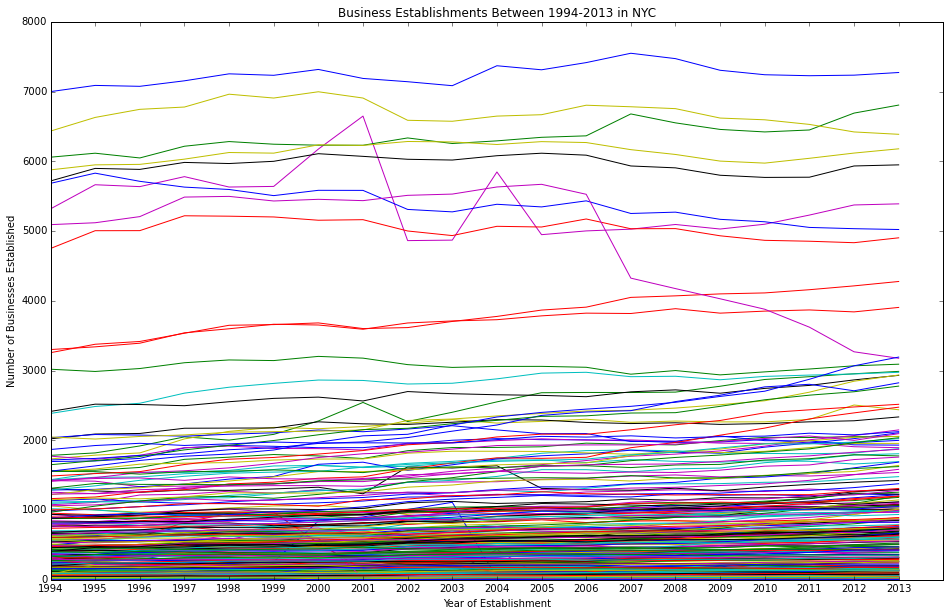

In [12]:
#GENERATING TIMESERIES
figure, ax = pl.subplots(figsize=(16,10))
ax.plot(matrix.transpose())
ax.set_title('Business Establishments Between 1994-2013 in NYC')
ax.set_xticks(np.arange(20))
ax.set_xticklabels(1994 + np.arange(20))
ax.set_xlabel('Year of Establishment')
ax.set_ylabel('Number of Businesses Established')

In [13]:
# Standardize Rows
matrix = matrix - matrix.mean(axis=1)[:,None]
matrix = matrix / matrix.std(axis=1)[:,None]

## First Method - K-Means

In [14]:
# using 8 clusters
num_clusters = 8
res = sklearn.cluster.KMeans(n_clusters=num_clusters).fit(matrix)

In [21]:
def plotClusters(clusters, labels):
    figure, ax = pl.subplots(figsize=(16,10))
    num_clusters = len(clusters)
    
    for i in range(num_clusters):
        ax.plot(matrix[labels == i].transpose(), color=kelly_colors_hex[i], alpha=.35)

    for i in range(num_clusters):
        ax.plot(clusters[i], color=kelly_colors_hex[i], linewidth=10, label='Cluster %s' % i)

    ax.set_xlim([0,19])
    ax.set_title('Business Establishments Between 1994-2013 in NYC')
    ax.set_xticks(np.arange(20))
    ax.set_xticklabels(1994 + np.arange(20))
    ax.set_xlabel('Year of Establishment')
    ax.set_ylabel('Number of Businesses Established')
    ax.legend(ncol=2)

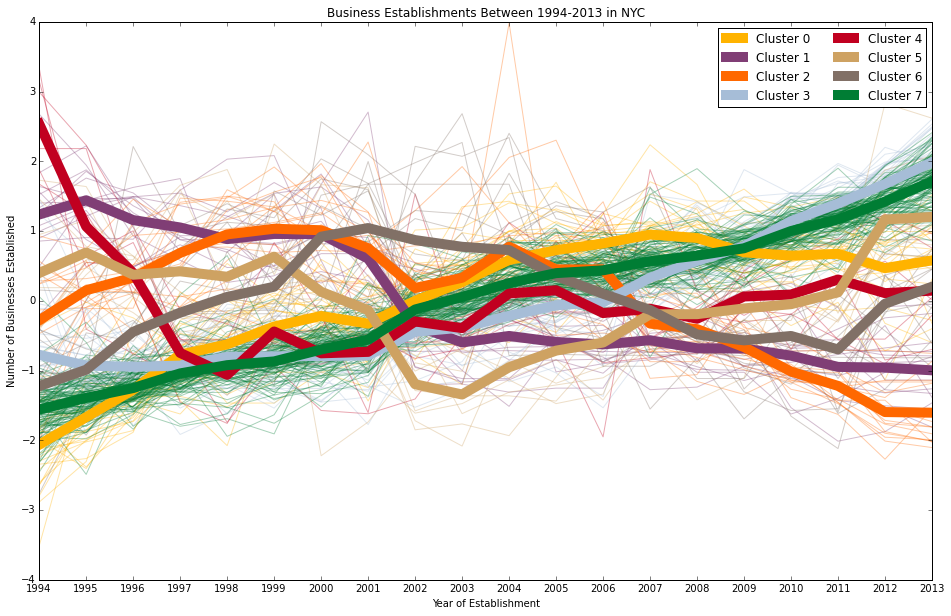

In [22]:
plotClusters(res.cluster_centers_, res.labels_)

In [23]:
def plotMap(labels):
    # Read in geojson file containing Zipcodes
    zips = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
    zips['postalCode'] = zips['postalCode'].astype(int)
    
    # Setup label data to be merged
    zip_business1['label'] = labels
    zip_business1['zipCode'] =  zip_business1.index
    
    # Merge
    merged = zips.merge(zip_business1, left_on='postalCode', right_on='zipCode')
    
    # Plot
    figure, ax = pl.subplots(figsize=(16,16))
    merged.plot(axes=ax, column='label', legend=True, categorical=True)
    ax.set_title('Business Establishments Between 1994-2013 in NYC')

In [24]:
res.labels_

array([0, 7, 7, 7, 0, 1, 6, 7, 6, 0, 0, 1, 0, 6, 1, 7, 2, 6, 2, 2, 0, 0, 7,
       7, 7, 0, 3, 7, 7, 7, 7, 7, 7, 6, 3, 2, 7, 7, 7, 2, 3, 0, 6, 2, 2, 4,
       4, 1, 5, 1, 2, 0, 3, 2, 0, 5, 1, 1, 2, 0, 1, 2, 5, 5, 5, 4, 6, 2, 2,
       3, 5, 2, 6, 7, 5, 1, 7, 2, 1, 5, 1, 1, 6, 6, 6, 0, 1, 0, 1, 0, 7, 3,
       7, 7, 7, 7, 7, 7, 7, 3, 7, 0, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3,
       6, 7, 0, 7, 7, 7, 5, 3, 3, 0, 7, 7, 3, 7, 4, 3, 0, 7, 7, 7, 7, 7, 7,
       3, 3, 7, 3, 3, 3, 7, 7, 3, 7, 3, 7, 7, 7, 3, 3, 7, 7, 7, 3, 7, 7, 7,
       3, 3, 3, 7, 7, 7, 7, 3, 3, 7, 4, 3, 3, 0, 7, 7, 7, 7, 7, 3, 0, 7, 7,
       6, 7, 7, 3, 7, 7, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 7, 6, 7, 7,
       3, 7, 7, 7, 7, 3, 7, 4, 7, 7, 7, 0, 7, 7, 7, 7, 7, 6, 3, 3, 3, 7, 0])

In [25]:
zip_business1['label'] = res.labels_

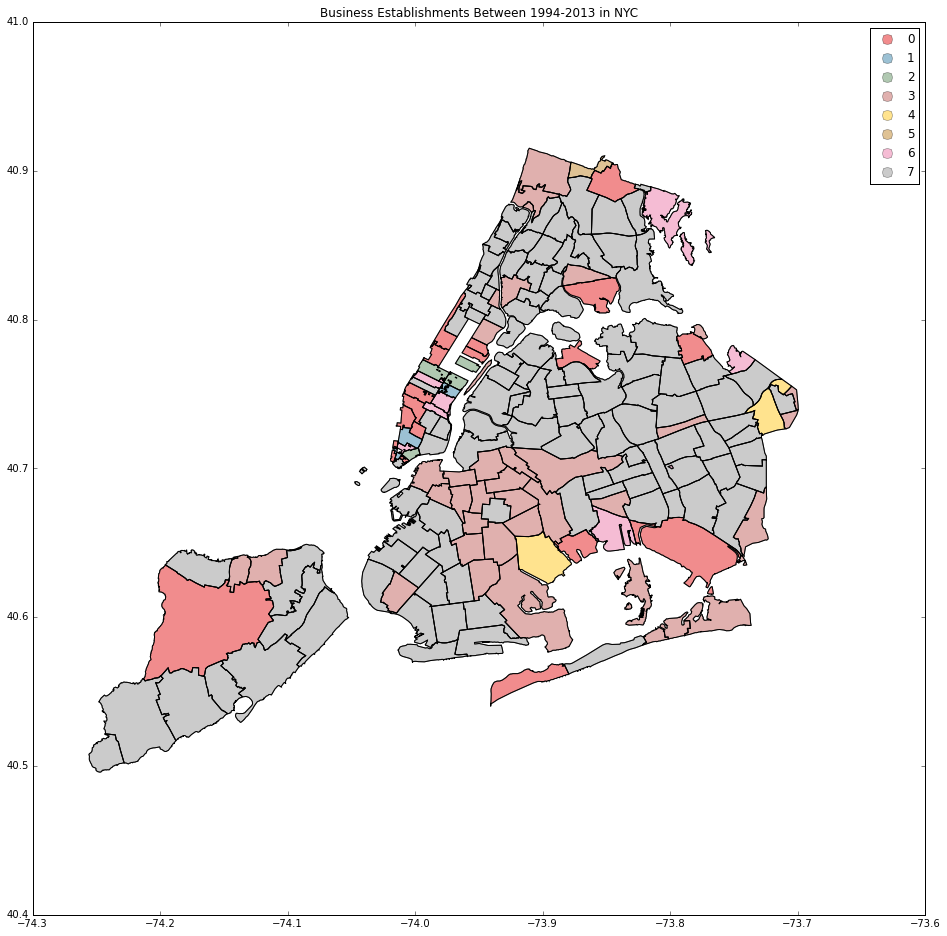

In [26]:
plotMap(res.labels_)

## Second Method - Affinity Propogration Algorithms

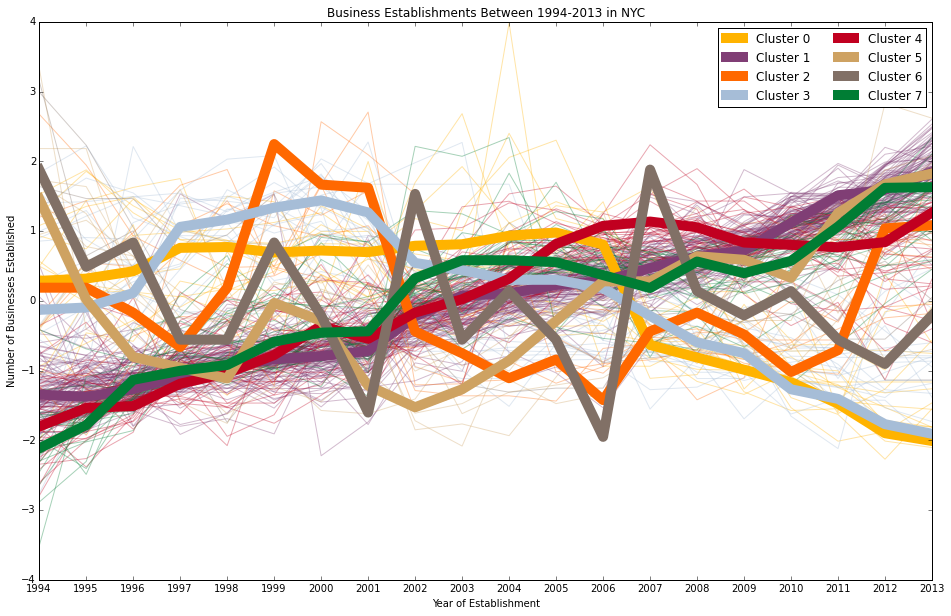

In [27]:
res = sklearn.cluster.AffinityPropagation(.999).fit(matrix)
plotClusters(res.cluster_centers_, res.labels_)

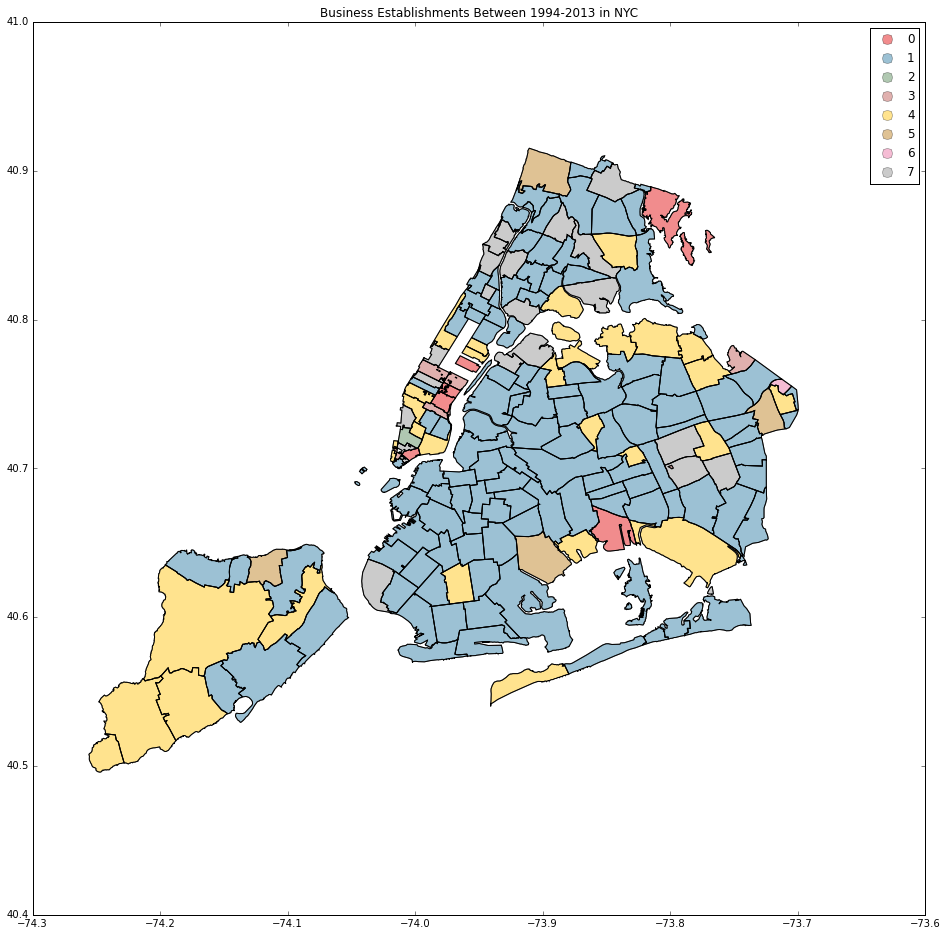

In [28]:
plotMap(res.labels_)


Comparing the two CLUSTERING methods

For K-means 8 clusters were chosen, for Affinity Propogation a damping value of .999 was used. Number of clusters in K-means method was mathched to Affinity Propogation and both seemed to produce the same output. As obsevred in both maps,Cluster 0 and 5 in Kmeans method was same as ckuster 7 and 4 in Affinity Propogation, and represented the maximum rise in business establishment over 20 years in NYC. The biggest cluster was represented by cluster 0 in kmeans and cluster 1 in Affinity Propogation

methodwise kmeans is a better method as it gives us more control over the number of clusters that can 